## Mixing Python and R

* Goal: getting Python and R to interact within a Jupyter notebook.
* Constraint: Jupyter notebooks use a single kernel, as opposed to RMarkdown
* Solution: start a standard Python kernel and interact with R using rpy2.

First the so-called "R magic" extension should be loaded: 

In [2]:
%load_ext rpy2.ipython

From now on, code cells starting with `%%R` will see their content evaluated as R code.
If the R code is generating figures, they will be displayed along with the rest of the output.

In [5]:
%%R
R.version.string
.libPaths()

R[write to console]: Error in library(tidyverse) : there is no package called ‘tidyverse’




Error in library(tidyverse) : there is no package called ‘tidyverse’


RInterpreterError: Failed to parse and evaluate line 'R.version.string\n.libPaths()\nlibrary(tidyverse)\n'.
R error message: 'Error in library(tidyverse) : there is no package called ‘tidyverse’'

Let's try it out with a small pandas data frame:

In [3]:
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

Get the data frame in R and plot:

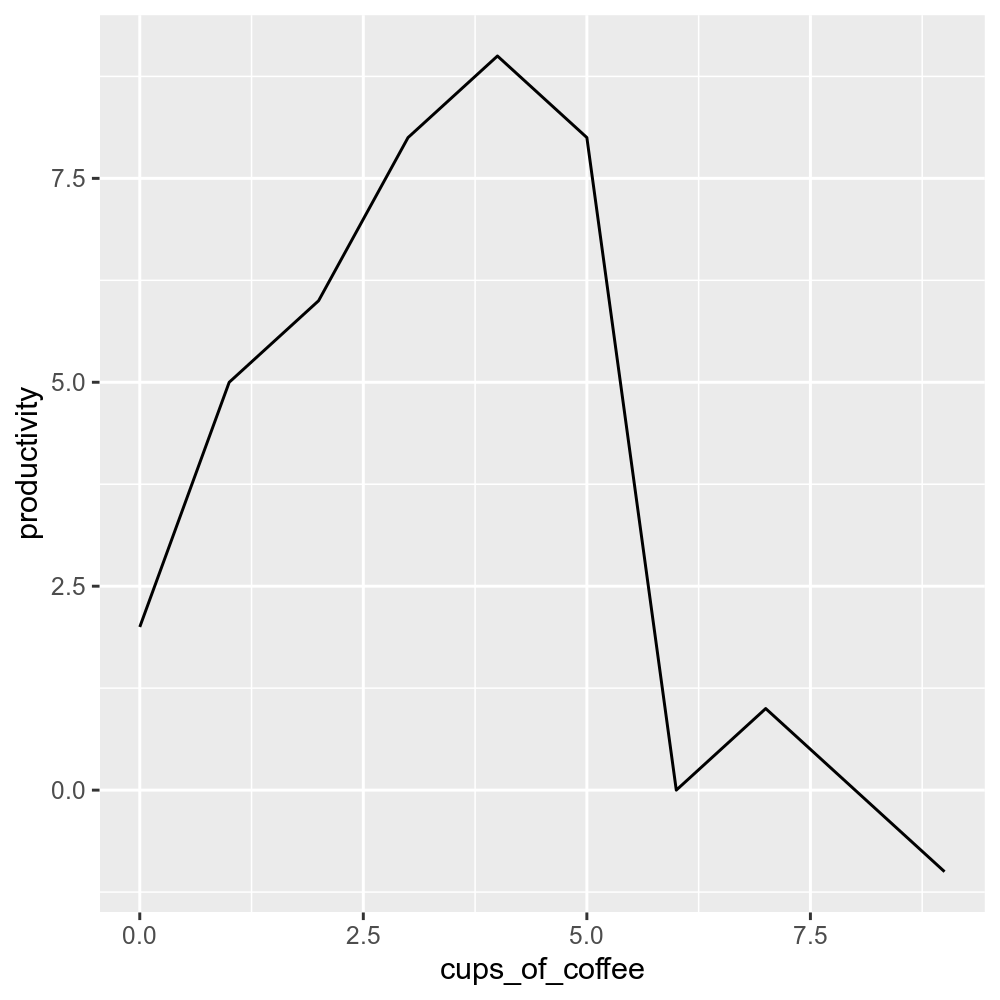

In [4]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

In [5]:
from rpy2.robjects import r
from IPython import get_ipython

def rpy2_competer(ipython, event):
    query = event.line.strip().split()[-1]
    suggestions = []
    all_r_symbols = r('sapply(search(), ls)')
    for environment, symbols in all_r_symbols.items():
        for _, symbol in symbols.items():
            if symbol.startswith(query):
                suggestions.append(symbol)
    return suggestions

ipython = get_ipython()
ipython.set_hook('complete_command', rpy2_competer, re_key='.*')